<a href="https://colab.research.google.com/github/blueberrylazjy/pytorch/blob/main/RNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

100


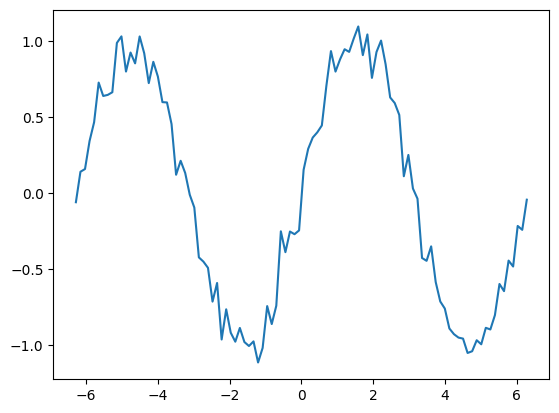

In [68]:
import torch
import math
import matplotlib.pyplot as plt

sin_x = torch.linspace(-2*math.pi, 2*math.pi, 100)
print(len(sin_x))
sin_y = torch.sin(sin_x) + 0.1*torch.randn(len(sin_x))
plt.plot(sin_x, sin_y)
plt.show()

In [80]:
from torch.utils.data import TensorDataset, DataLoader

n_time = 15  #時刻の数
n_sample = len(sin_x)-n_time #サンプル数

input_data = torch.zeros((n_sample, n_time, 1)) #入力
correct_data = torch.zeros((n_sample, 1)) #right answer
for i in range(n_sample):
  input_data[i] = sin_y[i:i+n_time].view(-1,1)
  correct_data[i] = sin_y[i+n_time:i+n_time+1]
  #正解は入力よりも１つ後

dataset = TensorDataset(input_data, correct_data)
#データセットを作成
train_loader = DataLoader(dataset, batch_size=8, shuffle=True) 



In [81]:
import torch.nn as nn
class Net(nn.Module):
  def __init__(self):
    super().__init__()
    self.rnn = nn.RNN(
        input_size=1,
        hidden_size =128,
        batch_first = True
    )
    self.fc = nn.Linear(128, 1)
  def forward(self,x):
    y_rnn, h=self.rnn(x, None)
    y=self.fc(y_rnn[:,-1,:])
#-1で最後の時刻のみ取得して全結合層へ渡す
    return y
net =Net()
print(net)


Net(
  (rnn): RNN(1, 128, batch_first=True)
  (fc): Linear(in_features=128, out_features=1, bias=True)
)



y_rnn, h = self.rnn(x, None)は、PyTorchのnn.RNNを用いたRNNの実行において、入力シーケンスxをself.rnnに与えて中間層の出力y_rnnと最終的な隠れ状態hを取得することを表します。

Epoch: 0 Loss_Train: 0.5017326352271166


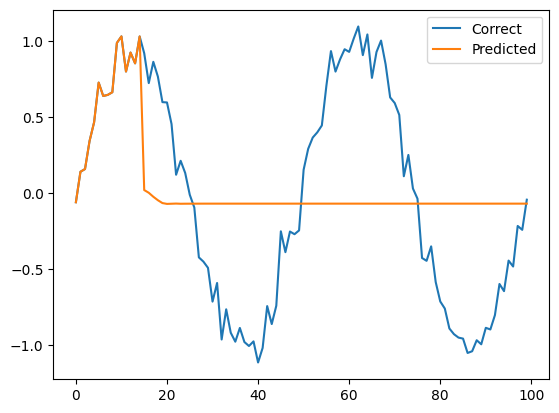

Epoch: 10 Loss_Train: 0.04584601877087897


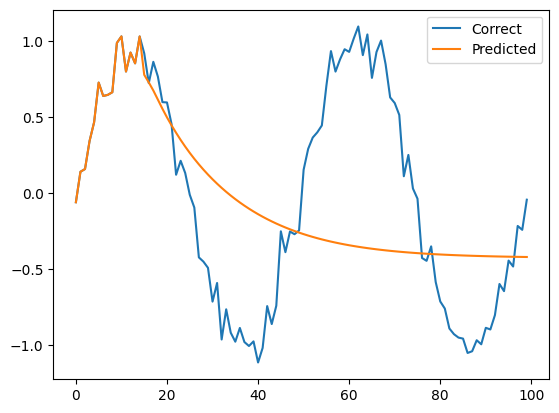

Epoch: 20 Loss_Train: 0.02473267826082354


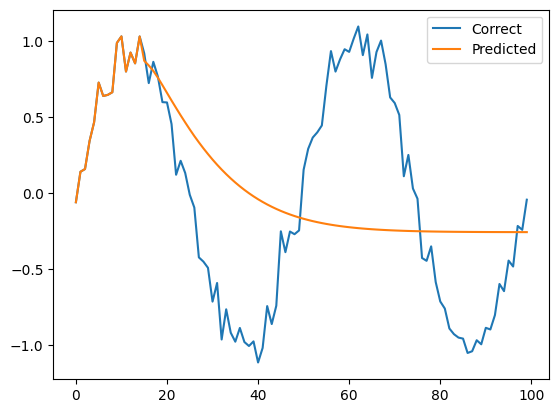

Epoch: 30 Loss_Train: 0.015300790906291117


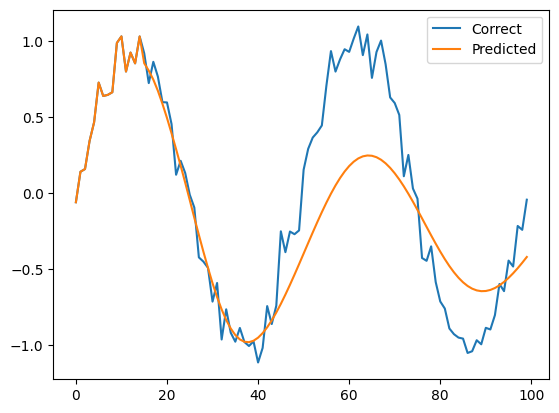

Epoch: 40 Loss_Train: 0.014899935827336529


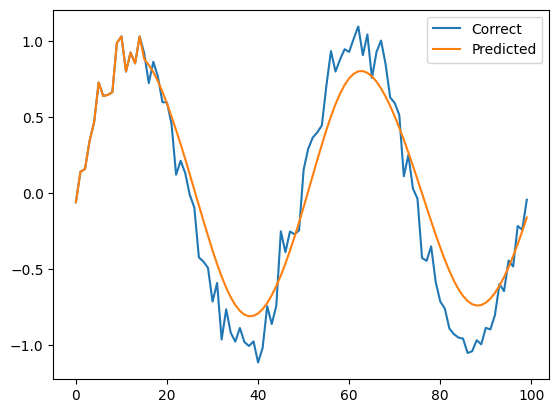

Epoch: 50 Loss_Train: 0.014296315949071537


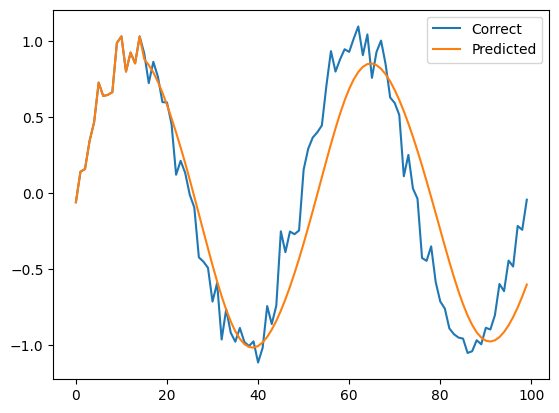

Epoch: 60 Loss_Train: 0.014656053263355385


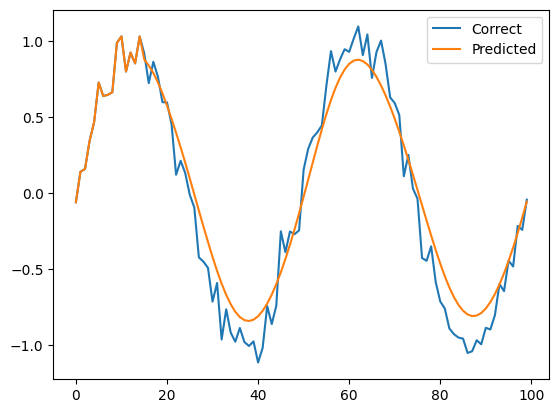

Epoch: 70 Loss_Train: 0.014208740935745564


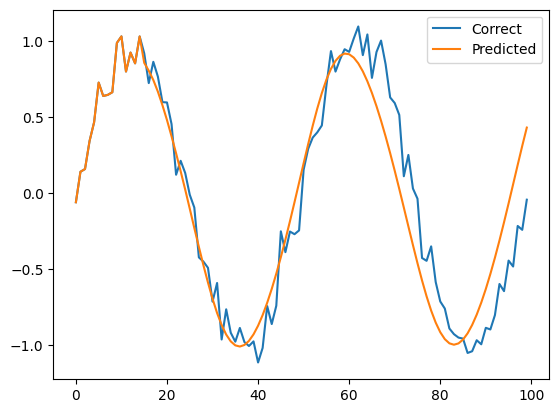

Epoch: 80 Loss_Train: 0.01415672529996796


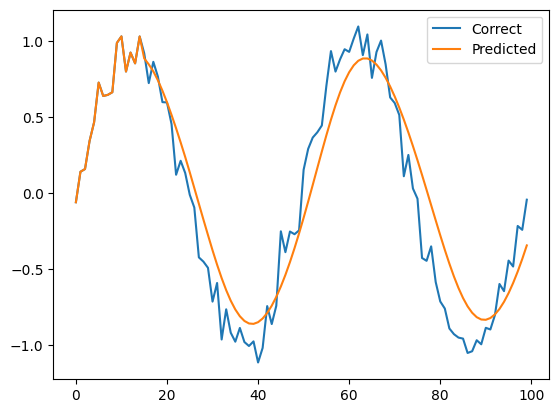

Epoch: 90 Loss_Train: 0.0139648384753276


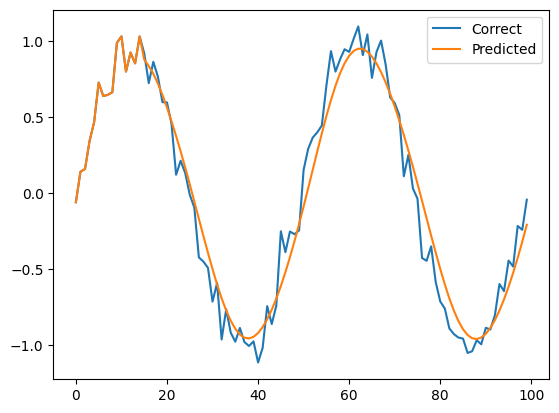

Epoch: 99 Loss_Train: 0.014280052855610847


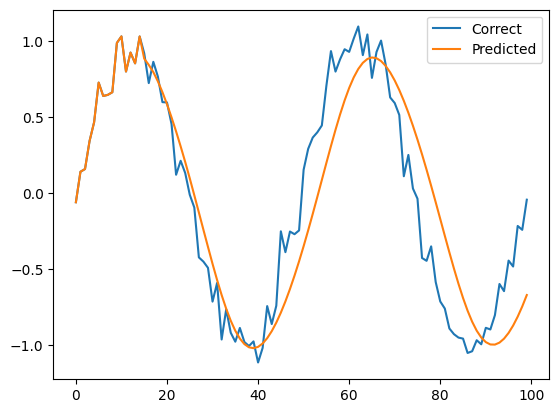

In [82]:
from torch import optim

loss_fnc = nn.MSELoss()

optimizer = optim.SGD(net.parameters(), lr=0.01)


record_loss_train=[]

epochs =100
for i in range(epochs):
  net.train()
  loss_train=0
  for j,(x,t) in enumerate(train_loader):
    y = net(x)
    loss = loss_fnc(y,t)
    loss_train += loss.item()
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
  loss_train /= j+1
  record_loss_train.append(loss_train)
  
  if i%10 == 0 or i== epochs-1:
    net.eval()
    print("Epoch:", i, "Loss_Train:", loss_train)
    predicted = list(input_data[0].view(-1)) #最初の入力

    for i in range(n_sample):
      x = torch.tensor(predicted[-n_time:]) #直近の時系列を取り出す [-xx:]は後ろからのxx個を取り出すことを意味する。
      x= x.view(1, n_time, 1) #(batchsize, 時刻の数,　入力の数)
      y= net(x)
      predicted.append(y[0].item())
    plt.plot(range(len(sin_y)), sin_y, label="Correct")
    plt.plot(range(len(predicted)), predicted, label="Predicted")
    plt.legend()
    plt.show()





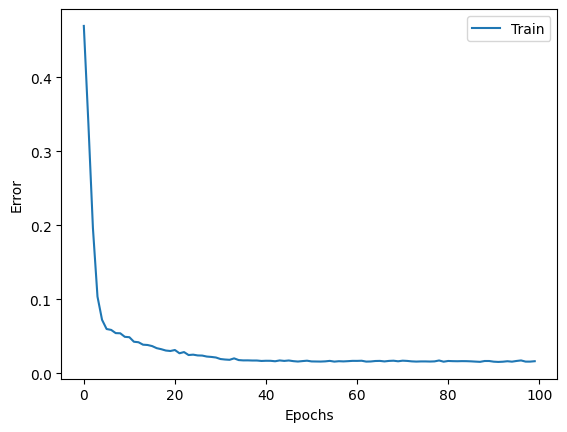

In [79]:
plt.plot(range(len(record_loss_train)), record_loss_train , label="Train")
plt.legend()

plt.xlabel("Epochs")
plt.ylabel("Error")
plt.show()

In [48]:
import torch

# サイズが3x4x5のテンソルを作成する
y_rnn = torch.randn(3, 4, 5)

# 最後の中間層の出力を取得する
last_hidden_state = y_rnn[:,-1,:]

print(last_hidden_state)

tensor([[ 0.8790,  0.9740, -0.1471, -1.5231,  1.5637],
        [ 1.4902,  0.7519, -0.2570,  0.6484,  1.2060],
        [-1.6869, -0.5569,  0.4300,  1.7396,  1.1403]])


In [49]:
import torch

# サイズが3x4x5のテンソルを作成する
y_rnn = torch.randn(3, 4, 5)
print(y_rnn)
# 最後の中間層の出力を取得する
last_hidden_state = y_rnn[:,-1,:]

print(last_hidden_state)

tensor([[[-0.0474,  0.4426, -1.4067,  0.3294, -0.8634],
         [ 1.3772,  1.7006, -1.3743, -0.3391, -0.7900],
         [ 0.4953,  0.9640, -0.9939, -0.4226, -1.1285],
         [-0.1275, -0.9499,  0.1544, -0.8224, -0.6216]],

        [[-0.3802, -0.1410,  1.8616,  0.1937, -0.0758],
         [-0.4119, -0.9998, -1.2148, -0.2196,  0.6576],
         [ 0.5356, -0.4894, -1.6233, -0.0961, -0.1113],
         [ 0.5295, -1.2126,  0.7421, -0.2467,  0.4255]],

        [[-0.3030,  0.3757,  0.2994, -0.6814, -1.5453],
         [-0.7800, -0.6378, -1.2490, -0.4758, -1.6622],
         [-1.0845, -0.0805, -0.4818, -0.5096, -0.7632],
         [ 0.3137,  0.2965, -1.5358,  0.6033, -0.2659]]])
tensor([[-0.1275, -0.9499,  0.1544, -0.8224, -0.6216],
        [ 0.5295, -1.2126,  0.7421, -0.2467,  0.4255],
        [ 0.3137,  0.2965, -1.5358,  0.6033, -0.2659]])


In [ ]:
import torch
import torch.nn as nn

# シーケンス長が3、特徴量が2の入力シーケンスを作成する
x = torch.randn(3, 1, 2)

# シーケンス長3、特徴量2、隠れ層サイズ4のRNNを作成する
rnn = nn.RNN(input_size=2, hidden_size=4, num_layers=1)

# RNNに入力シーケンスを与えて中間層の出力と最終的な隠れ状態を取得する
y_rnn, h = rnn(x, None)

print("y_rnn shape:", y_rnn.shape)
print("h shape:", h.shape)